In [ ]:
!gdown 1AmH9Syx-eM5CUChYg5SQf77xat2OvZX9
!pip install keract

Downloading...
From: https://drive.google.com/uc?id=1AmH9Syx-eM5CUChYg5SQf77xat2OvZX9
To: /content/CNN-Arch.png
100% 72.7k/72.7k [00:00<00:00, 64.0MB/s]


## Import libraries

In [ ]:
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers import BatchNormalization
from keras.models import Model
from keras.models import Sequential 
from keras.preprocessing import image
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

# Outline:


*   Load and Visualize MNIST Data
*   Preprocessing Image Data
*   CNN Classification Model
*   Visualize Convolutions
*   Pre-Trained Models




## Load and Visualize MNIST data

### Load Data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print( "Number of train data: "+str(X_train.shape[0]) )
print( "Number of test data:  "+str(X_test.shape[0]) )
print( "\n\nShape of X_train: \t" + str(X_train.shape) )
print( "\nShape of y_train: \t" + str(y_train.shape) )
print( "\nShape of X_test: \t" + str(X_test.shape) )
print( "\nShape of X_test: \t" + str(y_test.shape) )

Number of train data: 60000
Number of test data:  10000


Shape of X_train: 	(60000, 28, 28)

Shape of y_train: 	(60000,)

Shape of X_test: 	(10000, 28, 28)

Shape of X_test: 	(10000,)


### Visualize Data

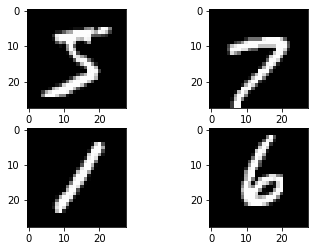

In [ ]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[123], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[31245], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[51069], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## Preprocessing Image Data

### Normalize Inputs

In [ ]:
# normalize inputs from 0-255 to [-1, 1]
X_train = X_train.reshape(X_train.shape[0],28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28, 1).astype('float32')
X_train = (X_train-128.0) / 128.0
X_test = (X_test-128.0) / 128.0
print( "Input shape: " + str(X_train.shape) )

Input shape: (60000, 28, 28, 1)


## Convert labels to One hot

In [ ]:
# one hot encode outputs
print( "Original shape of labels data:\t" + str(y_train.shape) )
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print( "Transformed shape of labels data:\t" + str(y_train.shape) )
print( "Number of classes: \t" + str(num_classes) )
print( "Label in one-hot: \t" , y_train[0] )

Original shape of labels data:	(60000,)
Transformed shape of labels data:	(60000, 10)
Number of classes: 	10
Label in one-hot: 	 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
def plotHistory(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## CNN classification model

### LeNet Architecture 

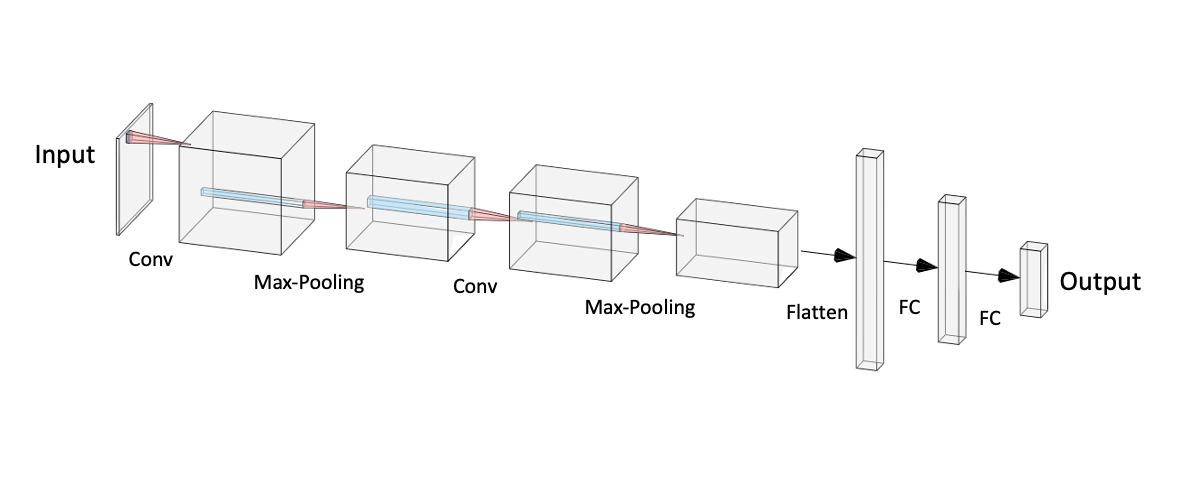

In [ ]:
# Linear stacking of layers
model = Sequential()                                 

# Convolution Layer 1
# 32 different 3x3 kernels -- so 32 feature maps
convLayer01 = Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1), strides=(1,1), padding='same', activation='relu')
model.add(convLayer01) 

# Pool the max values over a 2x2 kernel
model.add(MaxPooling2D(pool_size=(2,2)))


# Convolution Layer 2
# 32 different 3x3 kernels -- so 32 feature maps
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1,1), padding='same', activation='relu'))

# Pool the max values over a 2x2 kernel
convLayer02 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer02)

# Flatten final 7x7x32 output matrix into a 1568-length vector
model.add(Flatten())


# Fully Connected Layer 3
model.add(Dense(128, activation='relu'))


# Fully Connected Layer 4
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.33, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
315/315 [==============================] - 9s 20ms/step - loss: 0.2877 - accuracy: 0.9164 - val_loss: 0.0934 - val_accuracy: 0.9717
Epoch 2/10
315/315 [==============================] - 6s 18ms/step - loss: 0.0697 - accuracy: 0.9792 - val_loss: 0.0629 - val_accuracy: 0.9805
Epoch 3/10
315/315 [==============================] - 5s 17ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0587 - val_accuracy: 0.9824
Epoch 4/10
315/315 [==============================] - 4s 12ms/step - loss: 0.0368 - accuracy: 0.9885 - val_loss: 0.0477 - val_accuracy: 0.9866
Epoch 5/10
315/315 [==============================] - 4s 13ms/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0532 - val_accuracy: 0.9849
Epoch 6/10
315/315 [==============================] - 5s 14ms/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.0541 - val_accuracy: 0.9848
Epoch 7/10
315/315 [==============================] - 4s 14ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0505 - val_accuracy: 0.9862

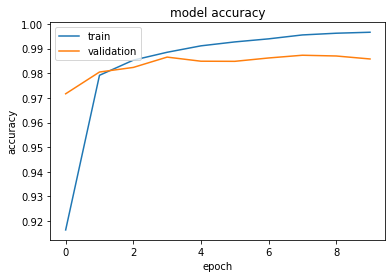

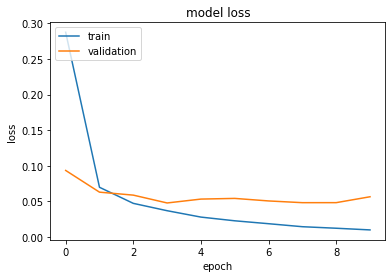

In [ ]:
plotHistory(history)

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.0401618666946888
Test accuracy: 0.9878000020980835


## Visualize Convolutions
But wouldn't it be nice if we could visualize those convolutions so that we can see what the model is seeing?

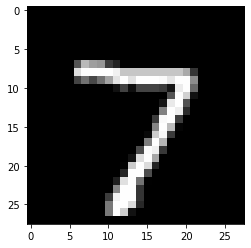

In [ ]:
plt.figure()
plt.imshow(X_test[0].reshape(28,28), cmap='gray', interpolation='none')

In [ ]:
from keract import get_activations, display_activations
keract_inputs =X_test[:1]
keract_targets = y_test[:1]
activations = get_activations(model, keract_inputs)

conv2d_input (1, 28, 28, 1) 


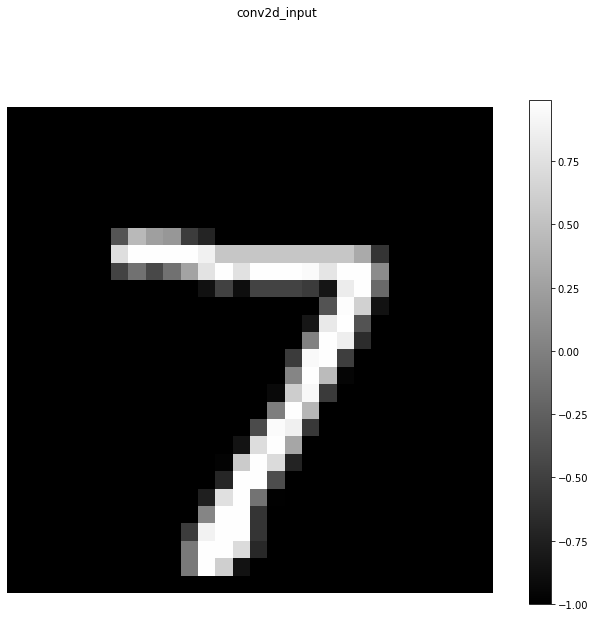

conv2d (1, 28, 28, 32) 


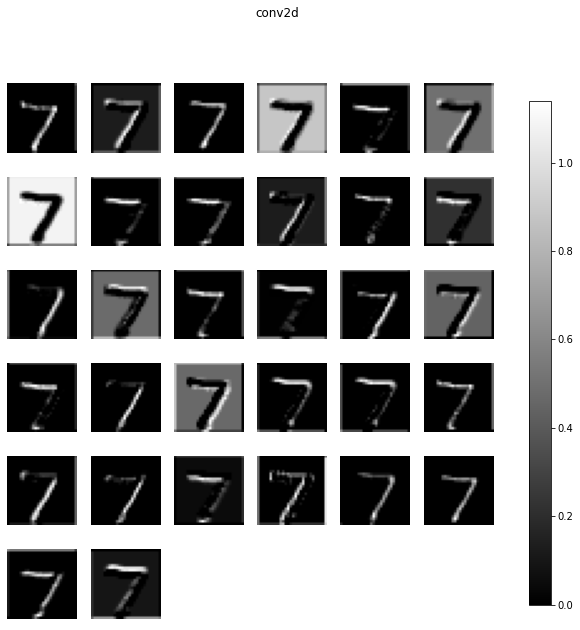

max_pooling2d (1, 14, 14, 32) 


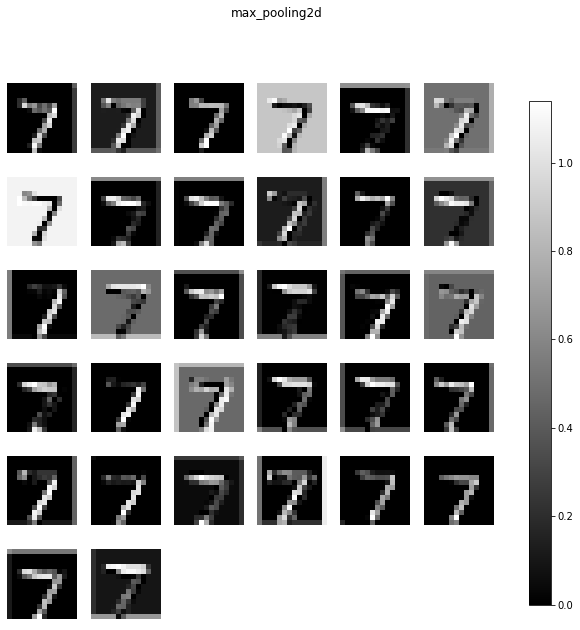

conv2d_1 (1, 14, 14, 32) 


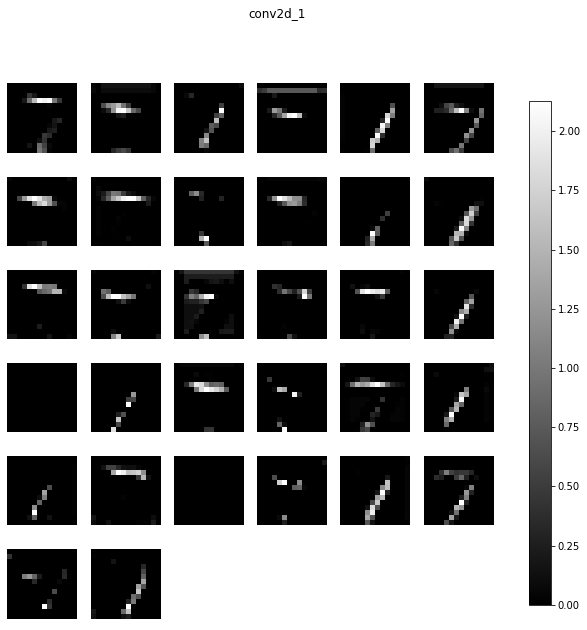

max_pooling2d_1 (1, 7, 7, 32) 


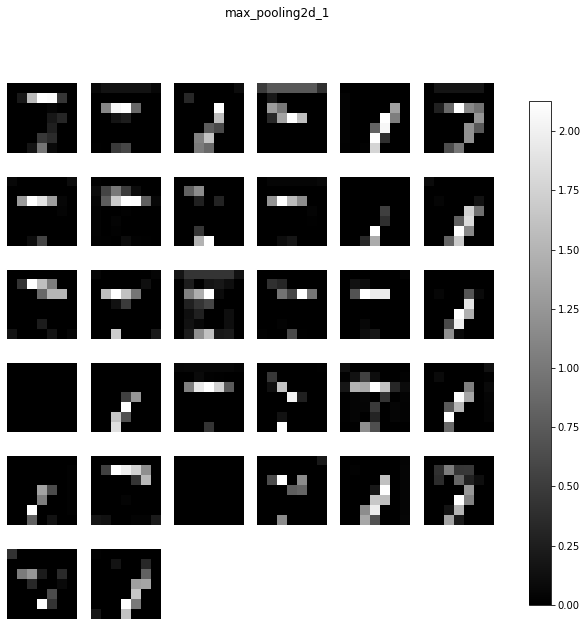

flatten (1, 1568) 


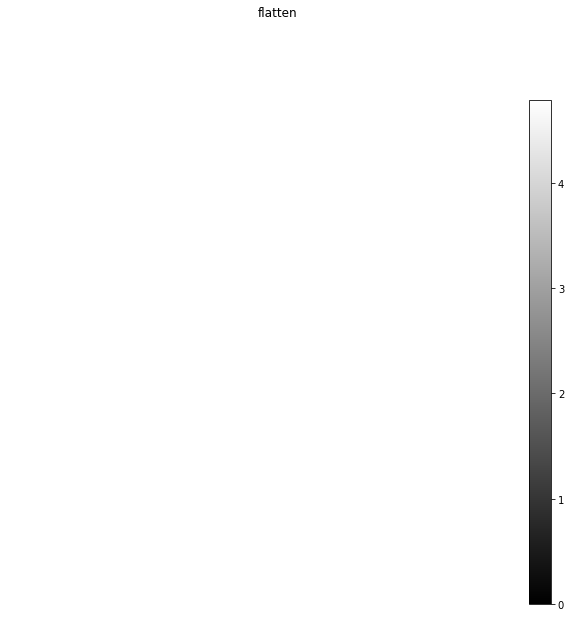

dense (1, 128) 


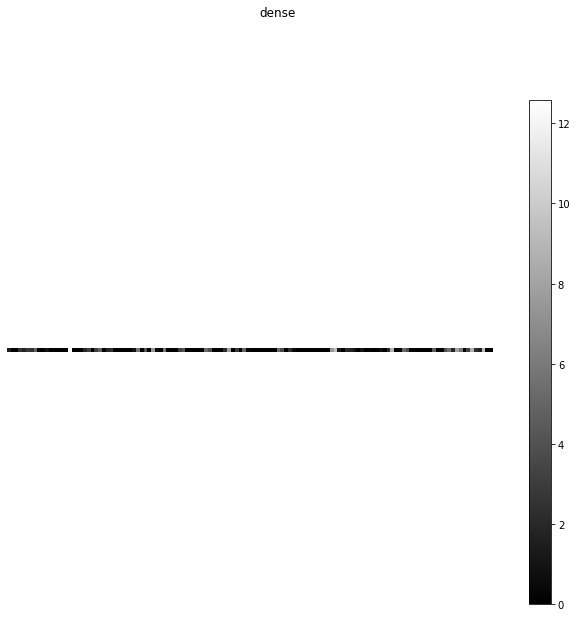

dense_1 (1, 10) 


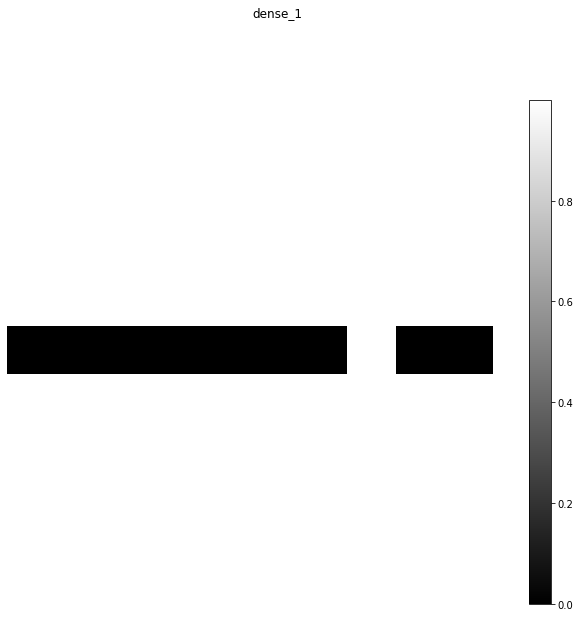

In [ ]:
display_activations(activations, cmap="gray", save=False,fig_size=(10,10))

## Pre-Trained Models

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O elephant.jpg

--2022-05-16 18:29:21--  https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168370 (164K) [image/jpeg]
Saving to: ‘elephant.jpg’

elephant.jpg        100%[===================>] 164.42K  --.-KB/s    in 0.1s    

2022-05-16 18:29:22 (1.67 MB/s) - ‘elephant.jpg’ saved [168370/168370]



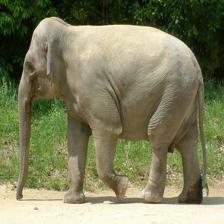

In [ ]:
from PIL import Image
img = Image.open('elephant.jpg')
img = img.resize((224, 224))
img.save('elephant_p.jpg')

from IPython.display import Image 
display(Image(filename='elephant_p.jpg'))

### VGG16 Architecture

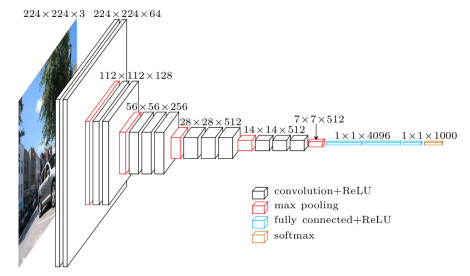

In [ ]:
# load vgg model
from keras.applications.vgg16 import VGG16

# load the model
model = VGG16(weights='imagenet', include_top=True, classes = 1000, classifier_activation="softmax")

# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

img_path = 'elephant_p.jpg'
img = image.load_img(img_path)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features = model.predict(x)
print('Predicted:', decode_predictions(features, top=3)[0])

Predicted: [('n02504013', 'Indian_elephant', 0.6501698), ('n02504458', 'African_elephant', 0.18973927), ('n01871265', 'tusker', 0.15831283)]


### ResNet50 Architecture

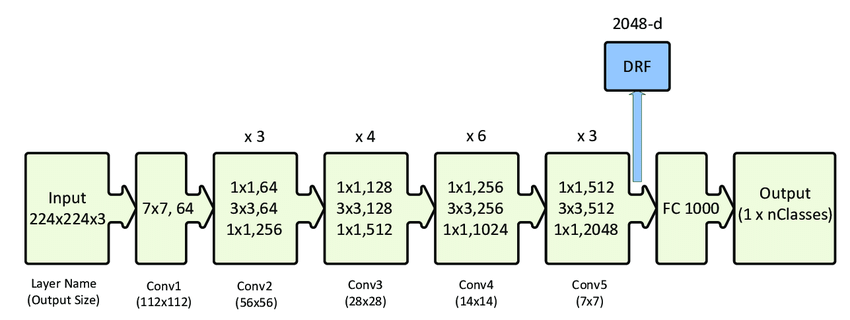

In [ ]:
# load resnet model
from tensorflow.keras.applications.resnet50 import ResNet50

# load the model
model = ResNet50(weights='imagenet')

# summarize the model
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

Predicted: [('n02504013', 'Indian_elephant', 0.81985754), ('n02504458', 'African_elephant', 0.117787845), ('n01871265', 'tusker', 0.05829759)]
